# 18 October 2021

## **Latihan Text Mining**

## **Gunakan dataset spam_or_not_spam**


* Preprocess data, gunakan lemmatization dan TF-IDF sebagai bagian dari preprocessing.  

* Tampilkan words frequency, wordcloud dan sentences length dari spam vs not spam.  

* Untuk text classification, coba gunakan model KNN, decision tree, logistic regression, dan random forest. Pilih metric yang dirasa paling cocok untuk kasus ini dan cari model paling optimal.
  
* Lakukanlah tuning pada model tersebut, lalu bandingkan hasil sebelum dan sesudah tuning.

## **Import libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import re

import warnings
warnings.filterwarnings('ignore')

## **Load dataset**

In [2]:
df = pd.read_csv('spam_or_not_spam.csv')
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [3]:
df['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

In [4]:
# Change email dtype to string
df['email'] = df['email'].astype(str)

## **Text Preprocessing 1**

**Methods:**

1. Converting to lower case
2. Contraction
3. Remove or convert number into text
4. Remove punctuation
5. Remove white spaces
6. Remove stopwords and particular words

**1. Converting to lower case**

In [5]:
def to_lower(text):
    return text.lower()

**2. Contraction**

In [6]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

**3. Remove or convert number into text**

In [7]:
def remove_numbers(text):
    output = ''.join(x for x in text if not x.isdigit())
    return output

**4. Remove punctuation**

In [8]:
from string import punctuation

In [9]:
def remove_punct(text):
    return ''.join(x for x in text if x not in punctuation)

**5. Remove white spaces**

In [10]:
def to_strip(text):
    return " ".join(text.split())

**6. Remove stop words and particular words**

In [11]:
import nltk
from nltk.corpus import stopwords

In [12]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([x for x in nltk.word_tokenize(sentence) if not x in stop_words])

## **Combine preprocessing methods**

In [13]:
df['email_prep1'] = df['email'].apply(to_lower)
df['email_prep2'] = df['email_prep1'].apply(main_contraction)
df['email_prep3'] = df['email_prep2'].apply(remove_numbers)
df['email_prep4'] = df['email_prep3'].apply(remove_punct)
df['email_prep5'] = df['email_prep4'].apply(to_strip)
df['email_prep6'] = df['email_prep5'].apply(remove_stopwords)

df

,email,label,email_prep1,email_prep2,email_prep3,email_prep4,email_prep5,email_prep6
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numbe...,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin posted tassos papadopoulos greek sculpt...
2,man threatens explosion in moscow thursday aug...,0,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion moscow thursday august...
3,klez the virus that won t die already the most...,0,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez virus die already prolific virus ever kle...
4,in adding cream to spaghetti carbonara which ...,0,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which h...,adding cream spaghetti carbonara effect pasta ...
...,...,...,...,...,...,...,...,...
2995,abc s good morning america ranks it the NUMBE...,1,abc s good morning america ranks it the numbe...,abc s good morning america ranks it the numbe...,abc s good morning america ranks it the numbe...,abc s good morning america ranks it the numbe...,abc s good morning america ranks it the number...,abc good morning america ranks number christma...
2996,hyperlink hyperlink hyperlink let mortgage le...,1,hyperlink hyperlink hyperlink let mortgage le...,hyperlink hyperlink hyperlink let mortgage le...,hyperlink hyperlink hyperlink let mortgage le...,hyperlink hyperlink hyperlink let mortgage le...,hyperlink hyperlink hyperlink let mortgage len...,hyperlink hyperlink hyperlink let mortgage len...
2997,thank you for shopping with us gifts for all ...,1,thank you for shopping with us gifts for all ...,thank you for shopping with us gifts for all ...,thank you for shopping with us gifts for all ...,thank you for shopping with us gifts for all ...,thank you for shopping with us gifts for all o...,thank shopping us gifts occasions free gift nu...
2998,the famous ebay marketing e course learn to s...,1,the famous ebay marketing e course learn to s...,the famous ebay marketing e course learn to s...,the famous ebay marketing e course learn to s...,the famous ebay marketing e course learn to s...,the famous ebay marketing e course learn to se...,famous ebay marketing e course learn sell comp...


## **Text preprocessing 2**

### **Lemmatization**

In [14]:
from nltk.stem import WordNetLemmatizer

In [15]:
wordnet_lemmatizer = WordNetLemmatizer()

In [16]:
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

**Apply lemmatization**

In [17]:
df['email_prep_lemma'] = df['email_prep6'].apply(lemmatize)

df['email_prep_lemma']

0       date wed number aug number number number numbe...
1       martin posted tasso papadopoulos greek sculpto...
2       man threatens explosion moscow thursday august...
3       klez virus die already prolific virus ever kle...
4       adding cream spaghetti carbonara effect pasta ...
                              ...                        
2995    abc good morning america rank number christmas...
2996    hyperlink hyperlink hyperlink let mortgage len...
2997    thank shopping u gift occasion free gift numbe...
2998    famous ebay marketing e course learn sell comp...
2999    hello chinese traditional 子 件 number世 o最有效的宣 鞣...
Name: email_prep_lemma, Length: 3000, dtype: object

## **Text exploration**

### **Words frequency**

In [18]:
def mydict(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    mydict = {'word':check.index,'freq':check.values}
    mydict = pd.DataFrame(mydict)
    mydict.index = mydict['word']
    mydict.drop('word', axis = 1, inplace = True)
    mydict.sort_values('freq', ascending=False, inplace=True)
    
    return mydict

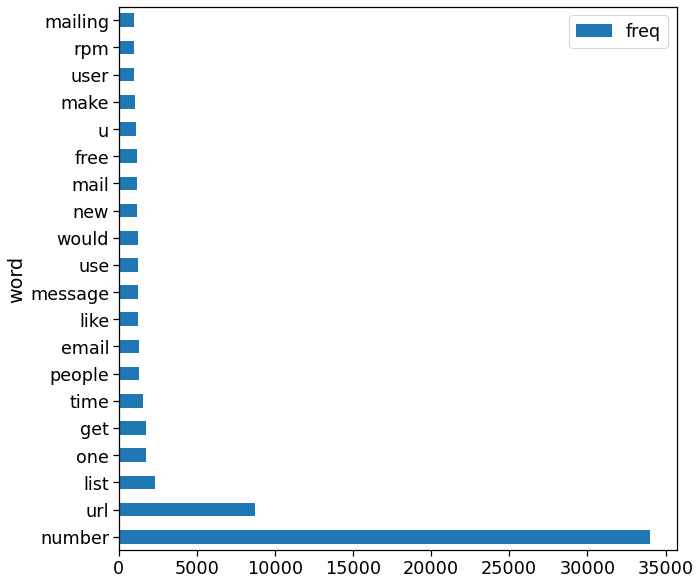

In [19]:
mydict_unclean = mydict(df['email_prep_lemma'])

sns.set_context(context = 'notebook', font_scale = 1.6)
mydict_unclean[:20].plot(kind = 'barh', figsize = (10, 10));

### **Word cloud**

In [20]:
from wordcloud import WordCloud

In [21]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')

In [22]:
word_cloud = WordCloud().generate(str(df['email_prep_lemma']))

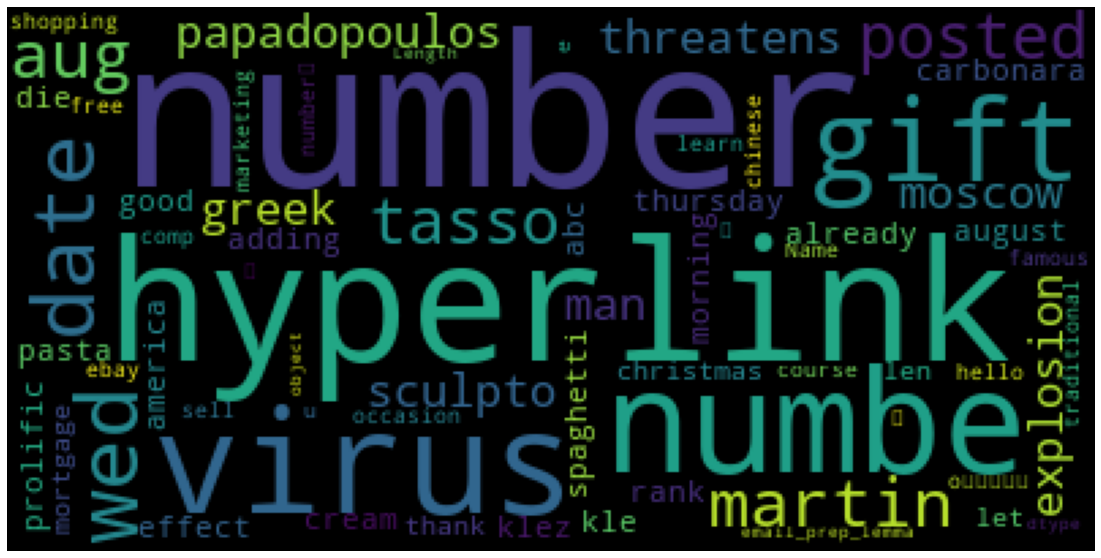

In [23]:
plot_cloud(word_cloud)

**Word cloud of spam**

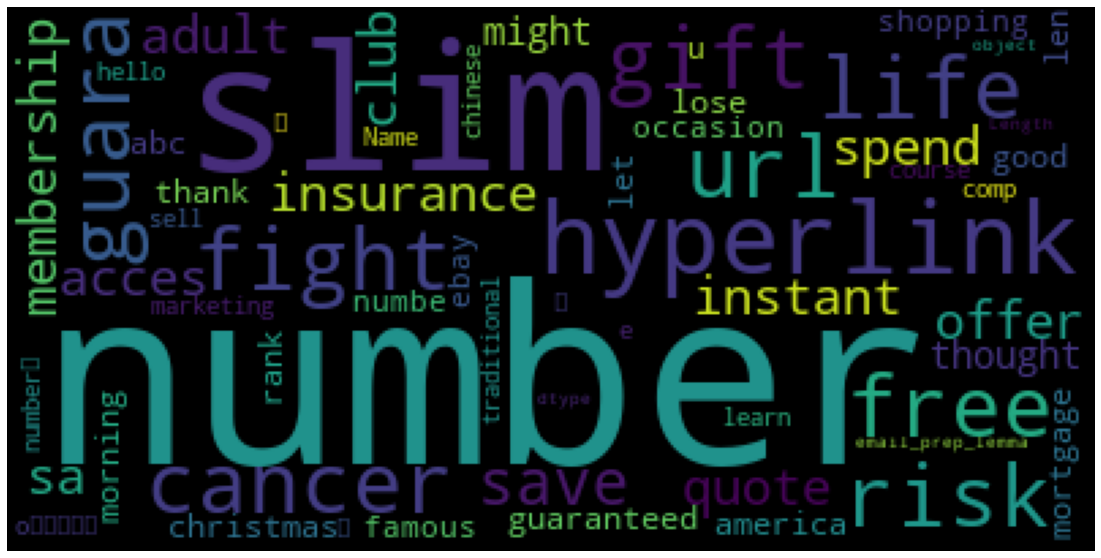

In [24]:
word_cloud_spam = WordCloud().generate(str(df[df['label'] == 1]['email_prep_lemma']))
plot_cloud(word_cloud_spam)

**Word cloud of ham**

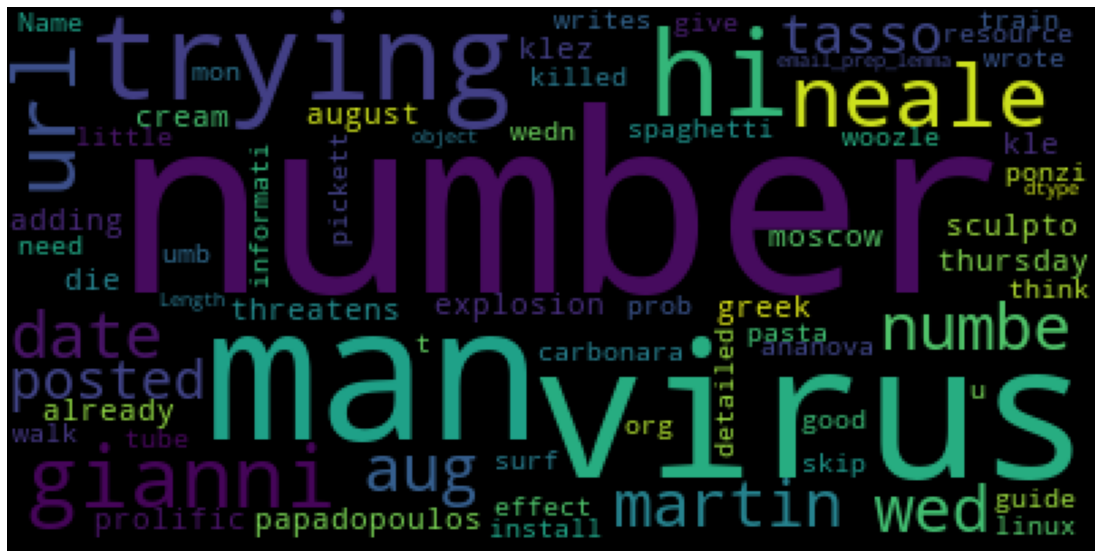

In [25]:
word_cloud_ham = WordCloud().generate(str(df[df['label'] == 0]['email_prep_lemma']))
plot_cloud(word_cloud_ham)

### **Length of sentences**

In [26]:
df['length'] = df['email'].apply(len) 

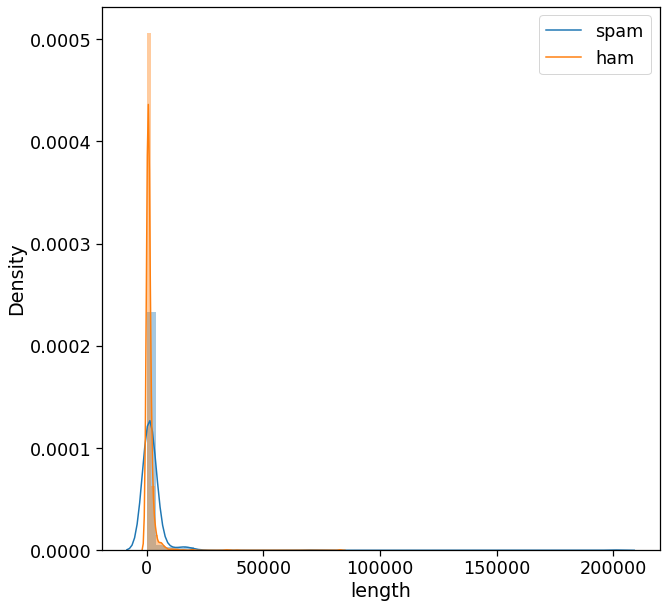

In [27]:
plt.figure(figsize = (10, 10))

df_spam = df[df['label'] == 1]
df_ham = df[df['label'] == 0]

sns.distplot(df_spam['length'])
sns.distplot(df_ham['length'])

plt.legend(['spam', 'ham']);

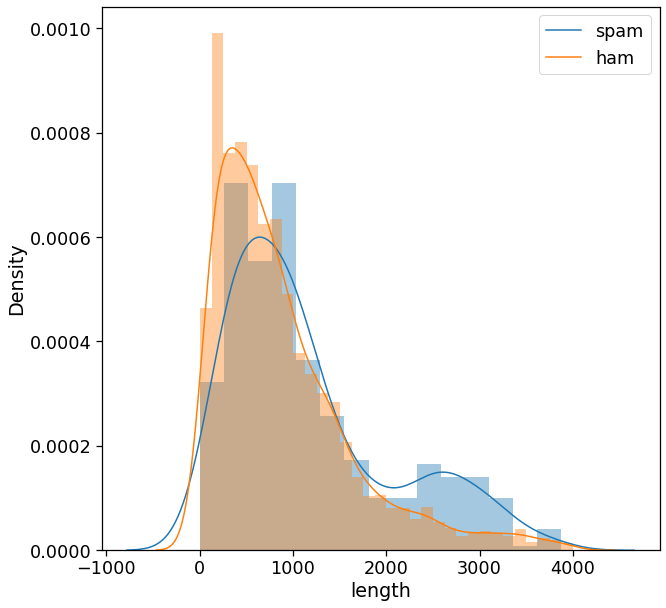

In [28]:
plt.figure(figsize = (10, 10))

df_email = df[df['length'] < 4000] 
df_spam = df_email[df_email['label'] == 1]
df_ham = df_email[df_email['label'] == 0]

sns.distplot(df_spam['length'])
sns.distplot(df_ham['length'])

plt.legend(['spam', 'ham']);

## **DTM IDF**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

### **Data splitting**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df['email_prep_lemma']
y = df['label']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

**Vectorizer**

In [33]:
vect = CountVectorizer().fit(X_train)
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

## **Text classification**

In [34]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, classification_report, accuracy_score

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

In [35]:
# Define models
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
logreg = LogisticRegression(random_state=0)
rf = RandomForestClassifier(random_state=0)

models = [knn, tree, logreg, rf]
score = []
nilai_mean = []
nilai_std = []

for i in models:
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
   
    model_cv = cross_val_score(i, X_train, y_train, cv=skfold, scoring='f1', error_score='raise')
    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

In [36]:
pd.DataFrame({
    'model':['knn', 'tree', 'logreg', 'rf'],
    'mean':nilai_mean,
    'std':nilai_std
})

,model,mean,std
0,knn,0.545744,0.058870
1,tree,0.844697,0.013132
2,logreg,0.961492,0.009449
3,rf,0.924957,0.009630


## **Model performance on test set**

In [37]:
models={
    'Logistic Regression': LogisticRegression(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),  
}

score=[]

for i in models:
    models[i].fit(X_train, y_train)
    y_pred=models[i].predict(X_test)
    score.append([f1_score(y_test, y_pred)])

score_before_tuning = pd.DataFrame(score, columns=['F1 score'], index = models.keys())
score_before_tuning


,F1 score
Logistic Regression,0.94958
Random Forest,0.92827


## **Hyperparameter tuning**

In [38]:
# Logistic Regression
hyperparam_space_logreg = {
    'model__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'model__solver': ['liblinear', 'newton-cg', 'lbfgs'],
    'model__max_iter': [100, 200, 300, 400, 500, 1000]
}



In [39]:
# Define vectorizer & models
vect = TfidfTransformer()

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
model = LogisticRegression(random_state=0)


# Pipeline
pipe = Pipeline([
    ('preprocessing', vect),
    ('model', model)
])


# Tuning
grid_logreg = GridSearchCV(
    pipe,
    param_grid = hyperparam_space_logreg,
    cv = skfold,
    scoring= 'f1',
    n_jobs= -1
)

In [40]:
grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', TfidfTransformer()),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001,
                                      0.0001],
                         'model__max_iter': [100, 200, 300, 400, 500, 1000],
                         'model__solver': ['liblinear', 'newton-cg', 'lbfgs']},
             scoring='f1')

In [41]:
print('Best score logreg:', grid_logreg.best_score_)
print('Best params logreg:', grid_logreg.best_params_)

Best score logreg: 0.9630216139616234
Best params logreg: {'model__C': 1000, 'model__max_iter': 100, 'model__solver': 'liblinear'}


In [42]:
logreg_tuning = grid_logreg.best_estimator_
logreg_tuning.fit(X_train, y_train)

y_pred_logreg_tuning = logreg_tuning.predict(X_test)

f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning)

In [43]:
score_list = [f1_logreg_tuning]
models = ['Logistic Regression']

score_after_tuning = pd.DataFrame({
    'Model': models,
    'F1 score': score_list
})

In [44]:
score_before_tuning

,F1 score
Logistic Regression,0.94958
Random Forest,0.92827


In [45]:
score_after_tuning

,Model,F1 score
0,Logistic Regression,0.95


In [46]:
print('Before tuning\n', classification_report(y_test, y_pred))
print('After tuning\n', classification_report(y_test, y_pred_logreg_tuning))

Before tuning
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       625
           1       0.98      0.88      0.93       125

    accuracy                           0.98       750
   macro avg       0.98      0.94      0.96       750
weighted avg       0.98      0.98      0.98       750

After tuning
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       625
           1       0.99      0.91      0.95       125

    accuracy                           0.98       750
   macro avg       0.99      0.96      0.97       750
weighted avg       0.98      0.98      0.98       750



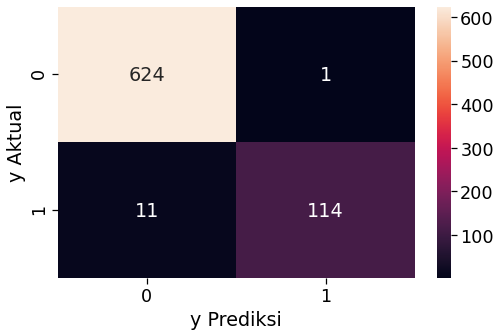

In [47]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg_tuning), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

## **Summary**

Dari keempat model yang dicoba, logistic regression memberikan output yang stabil dan menjadi model paling optimal. Hyperparameter tuning pun meningkatkan performa model dalam memprediksi apakah suatu email termasuk spam atau bukan, ditinjau dari nilai F1 score yang asalnya 0.93 menjadi 0.95 setelah tuning.
